# ctsm5.1.dev020 merge test and baseline comparison 

This notebook compares the results of merging in ctsm5.1.dev020 tag into fates_main_api with the baseline.  The standard regression tests were run and resulted in some differences, so this test consists of an 10 year f45 grid with the default fates setup and history variables.  The relevant pull request is here: [https://github.com/ESCOMP/CTSM/pull/1257](https://github.com/ESCOMP/CTSM/pull/1257)

## Import libraries

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Load history output data

In [3]:
filename_history_test = 'data/ctsm5.1.dev020-f45test.nc' # Test data
filename_history_base = 'data/ctsm5.1.dev020-f45base.nc' # Baseline data
data_test = xr.open_dataset(filename_history_test)
data_base = xr.open_dataset(filename_history_base)

## Select data subsets

Above ground coarse woody debris

In [4]:
litter_cwd_ag_test = data_test.LITTER_CWD_AG_ELEM.sel(fates_levelem=0)
litter_cwd_ag_base = data_base.LITTER_CWD_AG_ELEM.sel(fates_levelem=0)
litter_cwd_ag_diff = litter_cwd_ag_test - litter_cwd_ag_base

Below ground coarse woody debris

In [5]:
litter_cwd_bg_test = data_test.LITTER_CWD_BG_ELEM.sel(fates_levelem=0)
litter_cwd_bg_base = data_base.LITTER_CWD_BG_ELEM.sel(fates_levelem=0)
litter_cwd_bg_diff = litter_cwd_bg_test - litter_cwd_bg_base

Above ground fines (leaf)

In [6]:
litter_fines_ag_test = data_test.LITTER_FINES_AG_ELEM.sel(fates_levelem=0)
litter_fines_ag_base = data_base.LITTER_FINES_AG_ELEM.sel(fates_levelem=0)
litter_fines_ag_diff = litter_fines_ag_test - litter_fines_ag_base

Below ground fines (root)

In [7]:
litter_fines_bg_test = data_test.LITTER_FINES_BG_ELEM.sel(fates_levelem=0)
litter_fines_bg_base = data_base.LITTER_FINES_BG_ELEM.sel(fates_levelem=0)
litter_fines_bg_diff = litter_fines_bg_test - litter_fines_bg_base

Fuel intensity

In [8]:
fuel_intensity_test = data_test.FIRE_INTENSITY
fuel_intensity_base = data_base.FIRE_INTENSITY
fuel_intensity_diff = fuel_intensity_test - fuel_intensity_base

Fuel surface/volume

In [9]:
fuel_sav_test = data_test.FIRE_FUEL_SAV
fuel_sav_base = data_base.FIRE_FUEL_SAV
fuel_sav_diff = fuel_sav_test - fuel_sav_base

Effective Fuel moisture

In [10]:
fuel_eff_moist_test = data_test.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_base = data_base.FIRE_FUEL_EFF_MOIST
fuel_eff_moist_diff = fuel_eff_moist_test - fuel_eff_moist_base

Fuel bulk density

In [11]:
fuel_bulkd_test = data_test.FIRE_FUEL_BULKD
fuel_bulkd_base = data_base.FIRE_FUEL_BULKD
fuel_bulkd_diff = fuel_bulkd_test - fuel_bulkd_base

Fuel moisture (MEF)

In [12]:
fuel_mef_test = data_test.FIRE_FUEL_MEF
fuel_mef_base = data_base.FIRE_FUEL_MEF
fuel_mef_diff = fuel_mef_test - fuel_mef_base

Ground fuel within each patch age bin

In [13]:
# divide this by patch_area_by_age to get fuel per?
sum_fuel_pa_test = data_test.SUM_FUEL_BY_PATCH_AGE
sum_fuel_pa_base = data_base.SUM_FUEL_BY_PATCH_AGE
sum_fuel_pa_diff = sum_fuel_pa_test - sum_fuel_pa_base

Total ground fuel

In [14]:
sum_fuel_test = data_test.SUM_FUEL
sum_fuel_base = data_base.SUM_FUEL
sum_fuel_diff = sum_fuel_test - sum_fuel_base

Corrected fire intensity

In [15]:
fire_intensity_corr_test = data_test.FIRE_INTENSITY_AREA_PRODUCT / data_test.FIRE_AREA
fire_intensity_corr_base = data_base.FIRE_INTENSITY_AREA_PRODUCT / data_base.FIRE_AREA
fire_intensity_corr_diff = fire_intensity_corr_test - fire_intensity_corr_base

Fuel moisture (size-resolved)

In [16]:
fuel_moist_test = data_test.FUEL_MOISTURE_NFSC
fuel_moist_base = data_base.FUEL_MOISTURE_NFSC
fuel_moist_diff = fuel_moist_test - fuel_moist_base

Number of patches

In [17]:
npatches_test = data_test.ED_NPATCHES
npatches_base = data_base.ED_NPATCHES
npatches_diff = npatches_test - npatches_base

## Plot the data

### Global plots

Above ground coarse woody debris

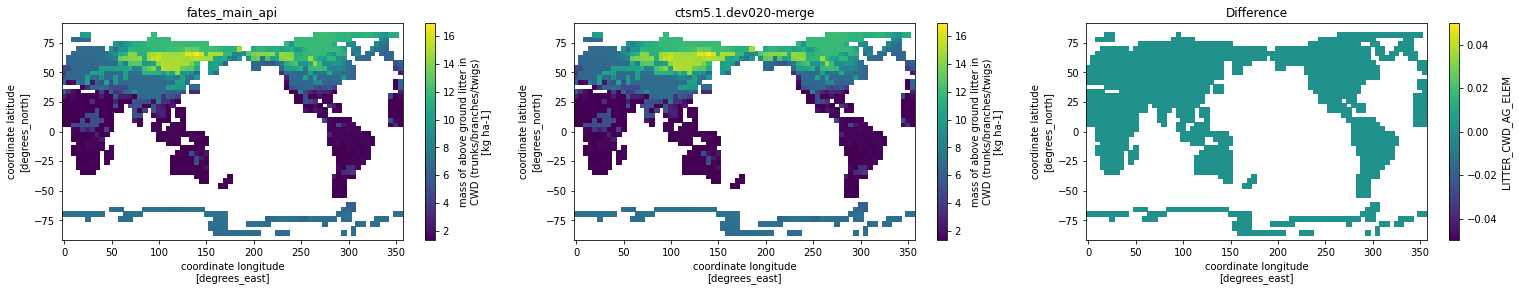

In [18]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
litter_cwd_ag_base.isel(time=tstop_idx).plot(ax=ax1);
litter_cwd_ag_test.isel(time=tstop_idx).plot(ax=ax2);
litter_cwd_ag_diff.isel(time=tstop_idx).plot(ax=ax3);
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference');

In [19]:
# diff ratio based on max scale
6000/40000

0.15

Number of patches

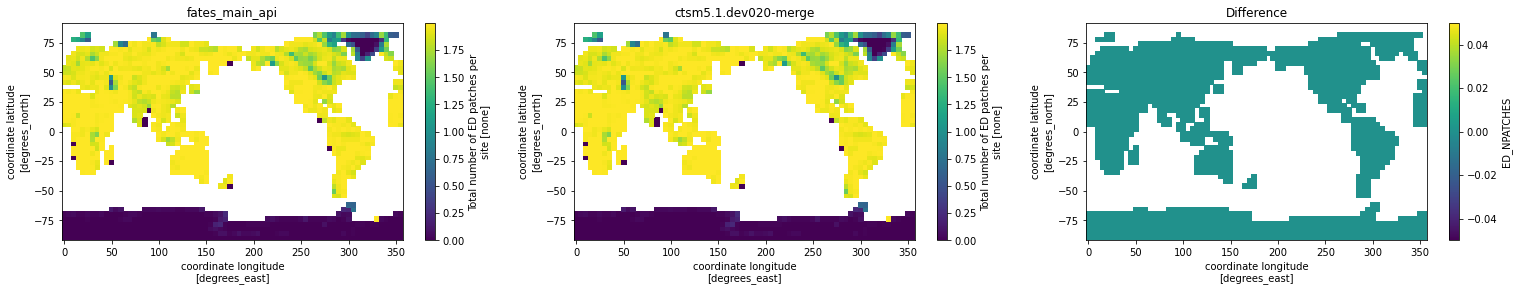

In [20]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
npatches_base.isel(time=tstop_idx).plot(ax=ax1);
npatches_test.isel(time=tstop_idx).plot(ax=ax2);
npatches_diff.isel(time=tstop_idx).plot(ax=ax3);
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference');

In [21]:
# diff ratio based on max scale
.04/10

0.004

Below ground coarse woody debris

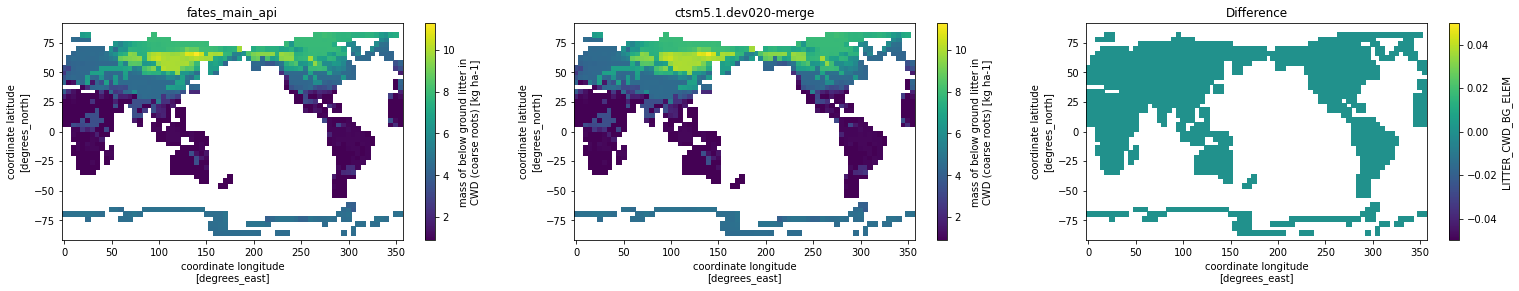

In [22]:
tstop_idx = 0
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
litter_cwd_bg_base.isel(time=tstop_idx).plot(ax=ax1)
litter_cwd_bg_test.isel(time=tstop_idx).plot(ax=ax2)
litter_cwd_bg_diff.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference');

In [23]:
# diff ratio based on max scale
4000/30000

0.13333333333333333

Above ground fines (leaf)

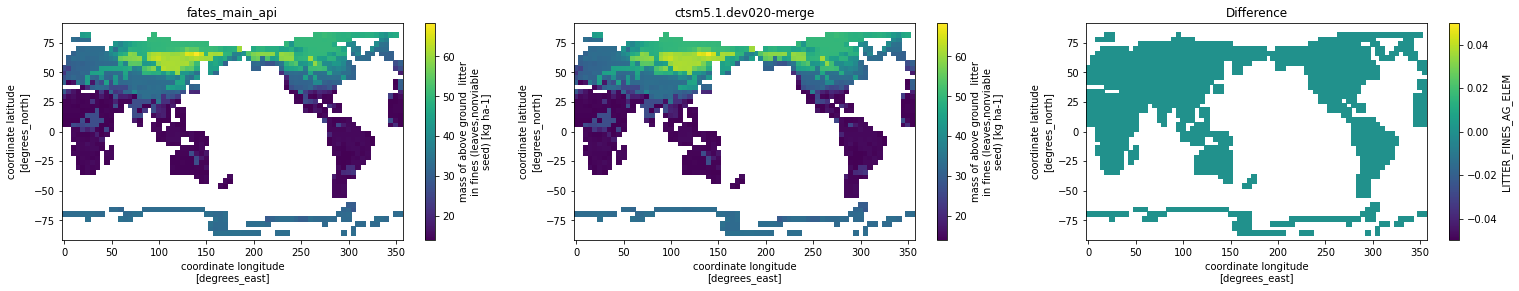

In [24]:
tstop_idx = 0
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
litter_fines_ag_base.isel(time=tstop_idx).plot(ax=ax1)
litter_fines_ag_test.isel(time=tstop_idx).plot(ax=ax2)
litter_fines_ag_diff.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge');
ax3.set_title('Difference');

In [25]:
# diff ratio based on max scale
4000/50000

0.08

Below ground fines (root)

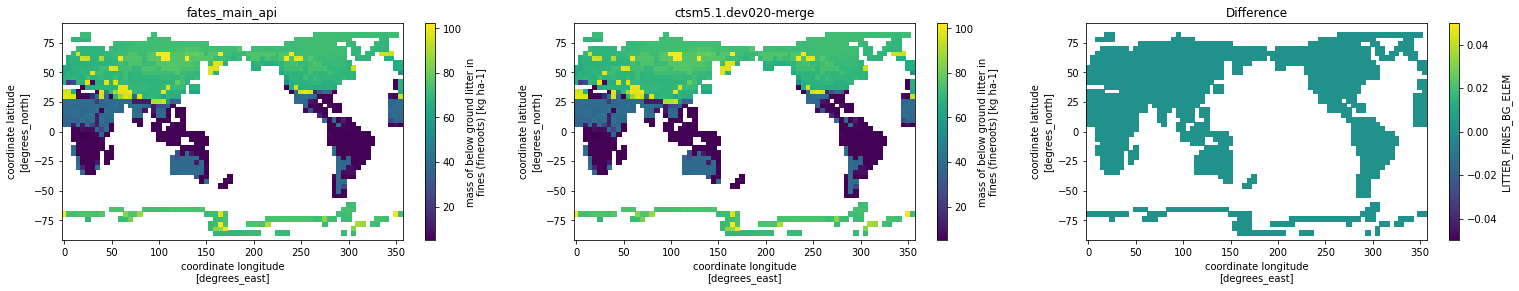

In [26]:
tstop_idx = 0
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
litter_fines_bg_base.isel(time=tstop_idx).plot(ax=ax1)
litter_fines_bg_test.isel(time=tstop_idx).plot(ax=ax2)
litter_fines_bg_diff.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge');
ax3.set_title('Difference');

In [27]:
# diff ratio based on max scale
2000/25000

0.08

Fuel intensity

Text(0.5, 1.0, 'Difference')

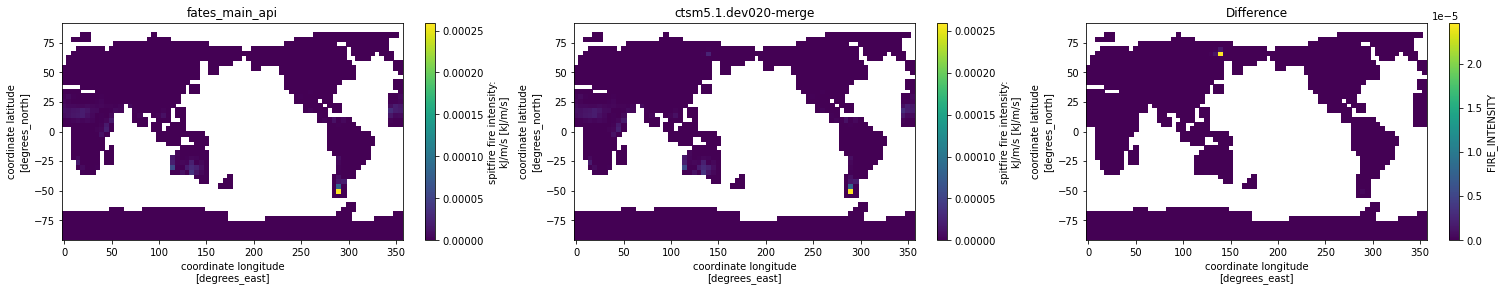

In [28]:
tstop_idx = 0
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fuel_intensity_base.isel(time=tstop_idx).plot(ax=ax1)
fuel_intensity_test.isel(time=tstop_idx).plot(ax=ax2)
fuel_intensity_diff.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference')

In [29]:
# diff ratio based on max scale
75/500

0.15

Fuel surface/volume

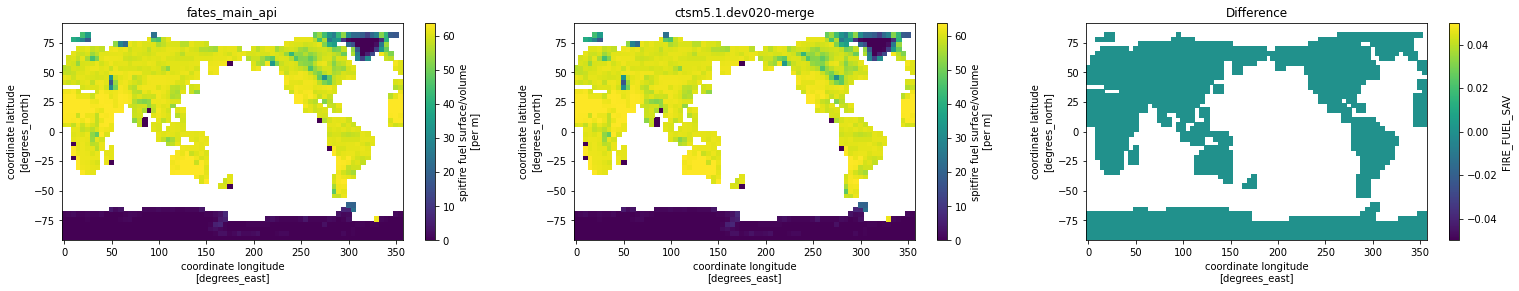

In [30]:
tstop_idx = 0
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fuel_sav_base.isel(time=tstop_idx).plot(ax=ax1)
fuel_sav_test.isel(time=tstop_idx).plot(ax=ax2)
fuel_sav_diff.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference');

In [31]:
# diff ratio based on max scale
6/60

0.1

Effective Fuel moisture

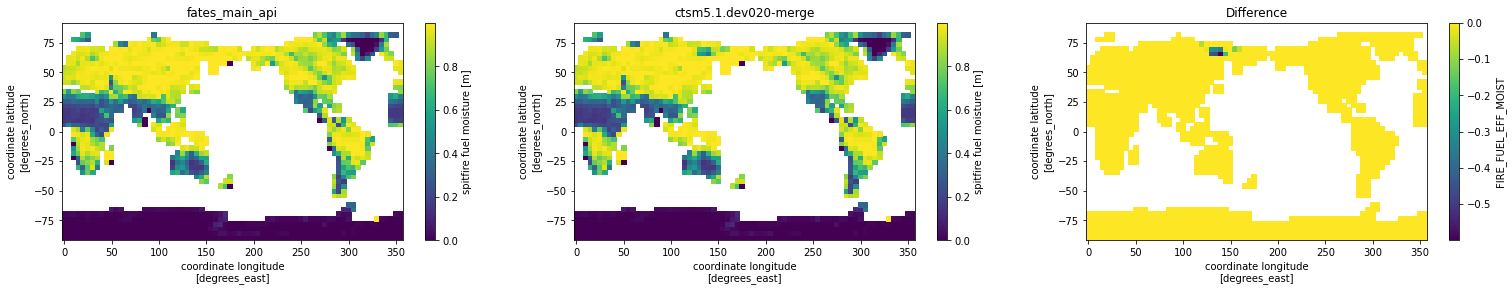

In [32]:
tstop_idx = 0
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fuel_eff_moist_base.isel(time=tstop_idx).plot(ax=ax1)
fuel_eff_moist_test.isel(time=tstop_idx).plot(ax=ax2)
fuel_eff_moist_diff.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference');

In [33]:
# diff ratio based on max scale
.08/1

0.08

Fuel bulk density

Text(0.5, 1.0, 'Difference')

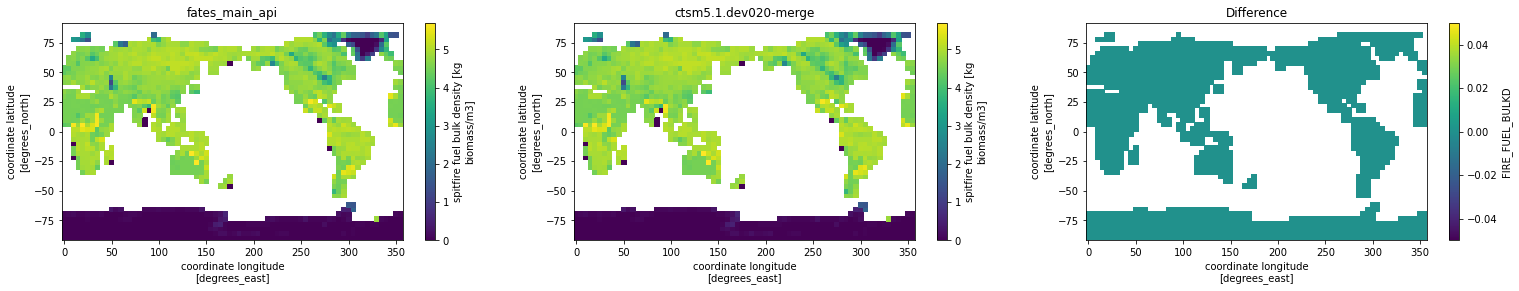

In [34]:
tstop_idx = 0
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fuel_bulkd_base.isel(time=tstop_idx).plot(ax=ax1)
fuel_bulkd_test.isel(time=tstop_idx).plot(ax=ax2)
fuel_bulkd_diff.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference')

In [35]:
# diff ratio based on max scale
1.5/12

0.125

Fuel moisture (MEF)

Text(0.5, 1.0, 'Difference')

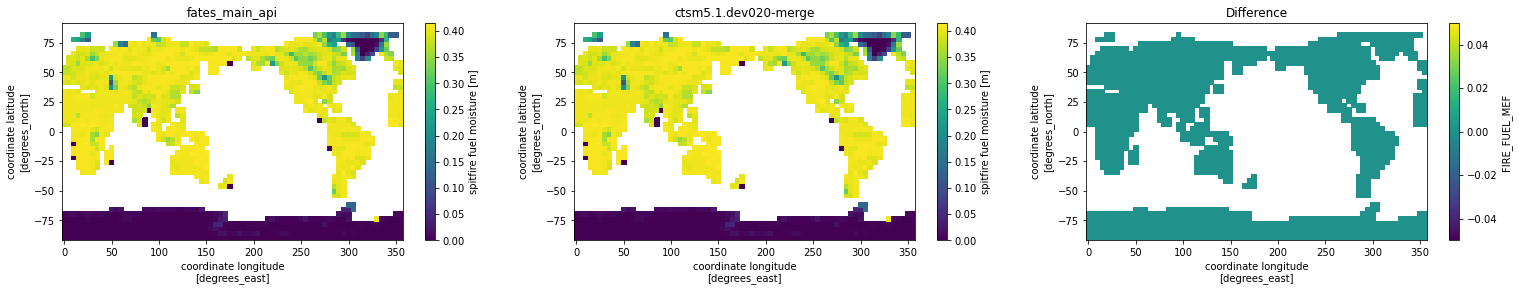

In [36]:
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fuel_mef_base.isel(time=tstop_idx).plot(ax=ax1)
fuel_mef_test.isel(time=tstop_idx).plot(ax=ax2)
fuel_mef_diff.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference')

In [37]:
# diff ratio based on max scale
.01/.4

0.024999999999999998

Ground fuel within each patch age bin

/home/gregorylemieux/local/miniconda3/envs/lbl_py3.8/lib/python3.8/site-packages/xarray/plot/facetgrid.py:373: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


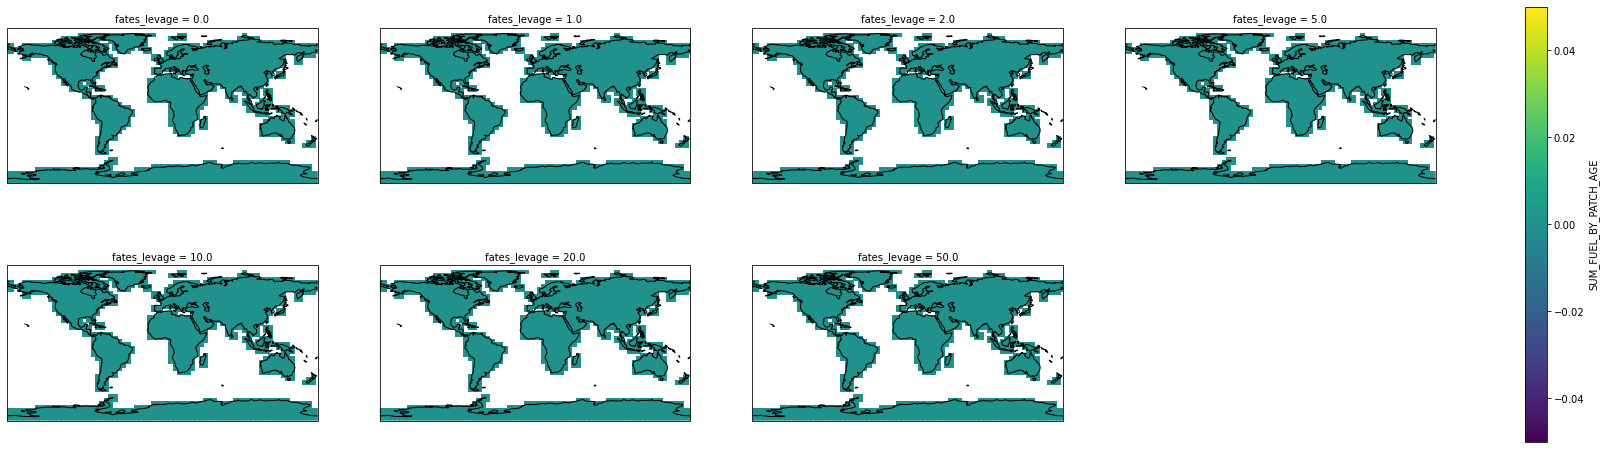

In [38]:
# tstop_idx = 119
fg = sum_fuel_pa_diff.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levage', col_wrap = 4, figsize=(32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

Ground fuel within each patch age bin (ctsm5.1.dev020-merge)

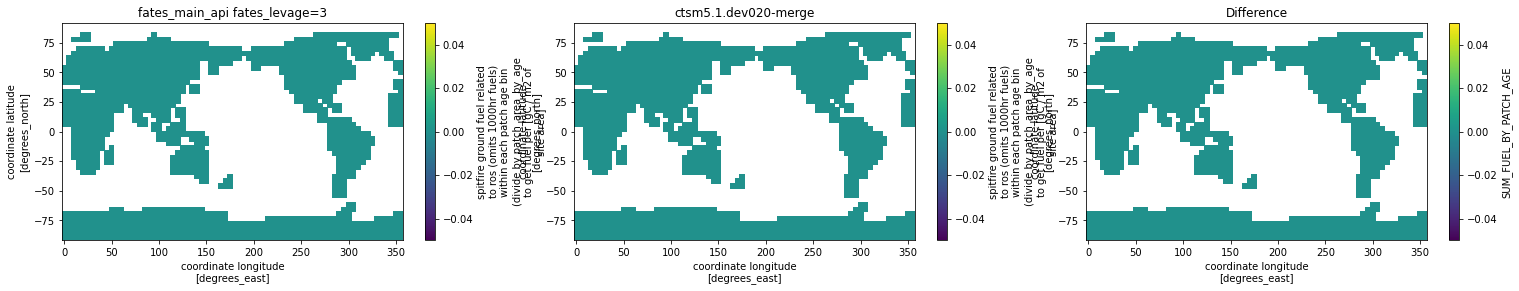

In [39]:
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
sum_fuel_pa_base.isel(time=tstop_idx,fates_levage=3).plot(ax=ax1)
sum_fuel_pa_test.isel(time=tstop_idx,fates_levage=3).plot(ax=ax2)
sum_fuel_pa_diff.isel(time=tstop_idx,fates_levage=3).plot(ax=ax3)
ax1.set_title('fates_main_api fates_levage=3');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference');

In [40]:
# diff ratio based on max scale
1500/4000

0.375

Total ground fuel

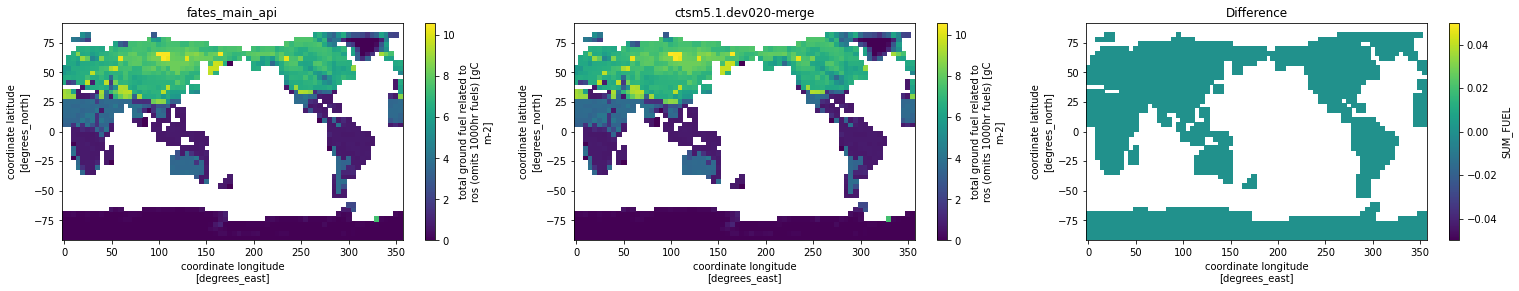

In [41]:
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
sum_fuel_base.isel(time=tstop_idx).plot(ax=ax1)
sum_fuel_test.isel(time=tstop_idx).plot(ax=ax2)
sum_fuel_diff.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference');

In [42]:
# diff ratio based on max scale
600/5000

0.12

Corrected fire intensity

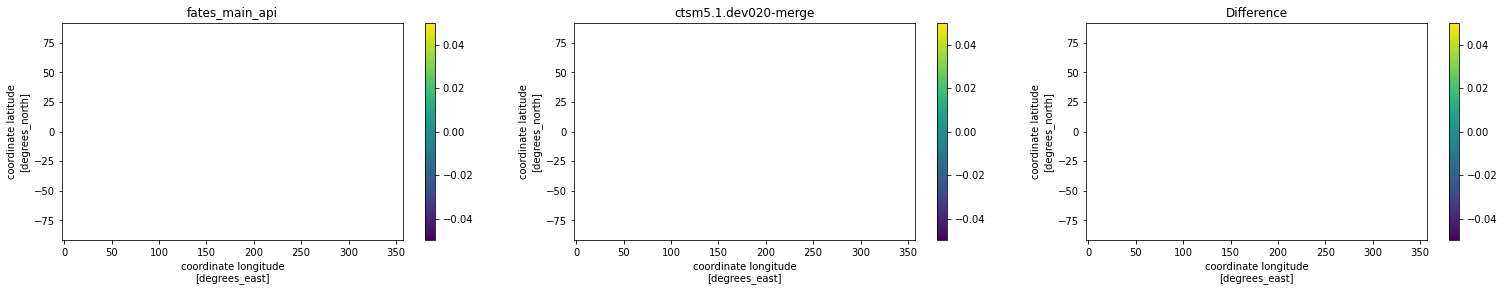

In [43]:
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
fire_intensity_corr_base.isel(time=tstop_idx).plot(ax=ax1)
fire_intensity_corr_test.isel(time=tstop_idx).plot(ax=ax2)
fire_intensity_corr_diff.isel(time=tstop_idx).plot(ax=ax3)
ax1.set_title('fates_main_api');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference');

In [44]:
# diff ratio based on max scale
1000/5000

0.2

Fuel moisture

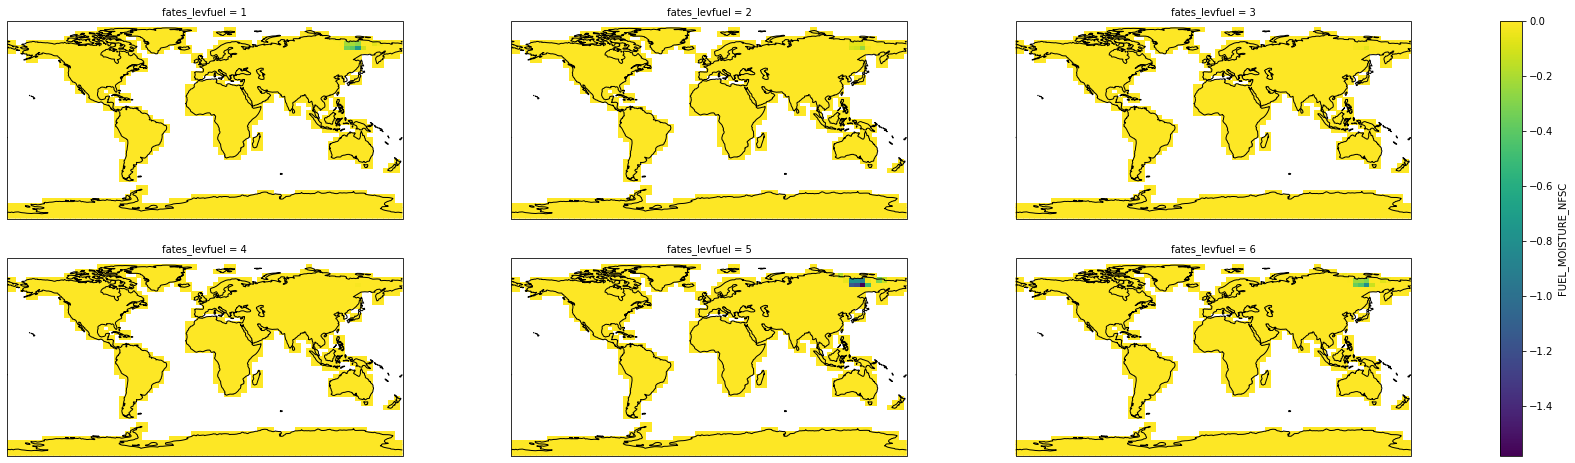

In [45]:
# tstop_idx = 119
fg = fuel_moist_diff.isel(time=tstop_idx).plot(transform=ccrs.PlateCarree(),
                            col='fates_levfuel', col_wrap = 3, figsize = (32,8),
                            subplot_kws={'projection': ccrs.PlateCarree()})
for ax in fg.axes.flat:
    ax.coastlines()

Fuel moisture (Difference)

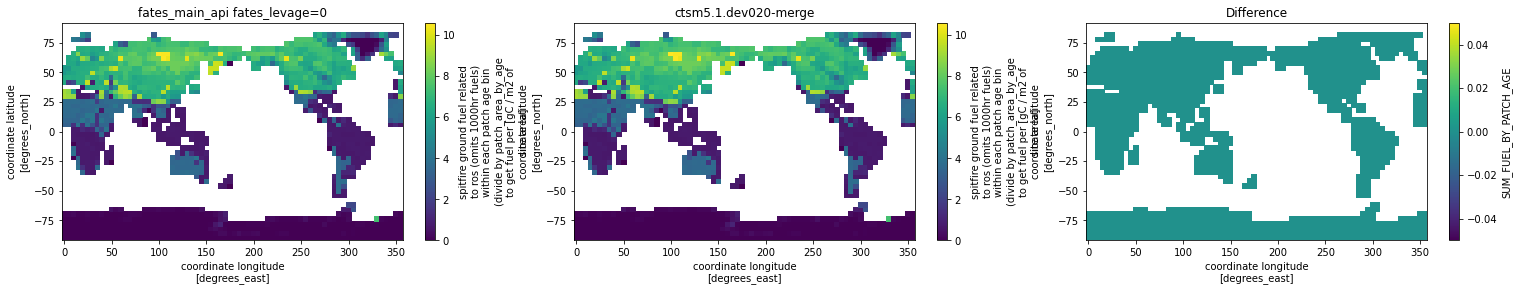

In [46]:
# tstop_idx = 119
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))
sum_fuel_pa_base.isel(time=tstop_idx,fates_levage=0).plot(ax=ax1)
sum_fuel_pa_test.isel(time=tstop_idx,fates_levage=0).plot(ax=ax2)
sum_fuel_pa_diff.isel(time=tstop_idx,fates_levage=0).plot(ax=ax3)
ax1.set_title('fates_main_api fates_levage=0');
ax2.set_title('ctsm5.1.dev020-merge')
ax3.set_title('Difference');

In [47]:
# diff ratio based on max scale
2000/2500

0.8